# Plotting with Seaborn

## What is seaborn

* Seaborn is a statistical plotting library
* Has build-in default styles
* Designed to work nicely with pandas dataframes

## Installation 

If seaborn is not installed on your system, you need to install seaborn first with either:
```
conda install seaborn
```
or
```
pip install seaborn
```

## Documentation

Seaborn documentation available at [http://seaborn.pydata.org/examples/index.html](http://seaborn.pydata.org/examples/index.html)

## Imports

First we import seaborn and numpy

In [73]:
import seaborn as sns
import numpy as np
%matplotlib inline

## Data
Seaborn comes with built-in data sets!

In [74]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Plot types

In this lecture we will learn how to build following plots using seaborn:

* distribution plots
* categorical plots
* matrix plots
* regression plots

## Distribution Plots

Let's discuss some plots that allow us to visualize the distribution of a data set. These plots are:

* distplot
* jointplot
* pairplot
* rugplot
* kdeplot

## distplot

The `distplot()` shows the distribution of a univariate (one variable) set of observations. It it is mixture of matplotlib `hist` function (with automatic
calculation of a good default bin size) with the seaborn `kdeplot` function (`kdeplot` plots a kernel density estimate, which is an estimation of the probability density function of a random variable that produced the data sample).

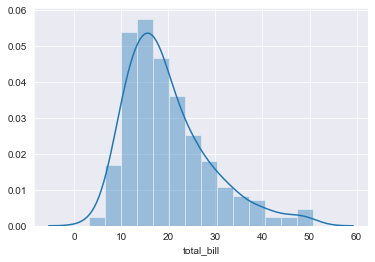

In [10]:
sns.distplot(tips['total_bill'])
# Safe to ignore warnings

To remove the kde layer and just have the histogram use:

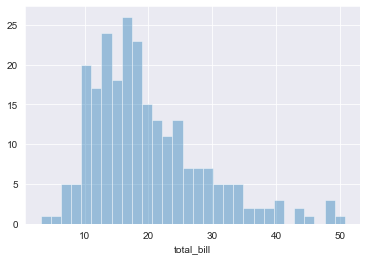

In [11]:
sns.distplot(tips['total_bill'],kde=False,bins=30)

## jointplot

`jointplot()` allows you to basically match up two distplots for bivariate data. With your choice of what **kind** parameter to compare with: 
* `scatter`
* `reg`
* `resid`
* `kde`
* `hex`

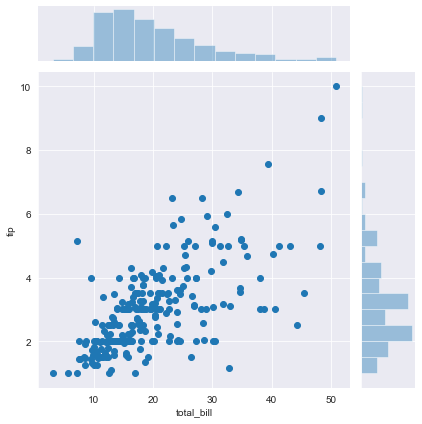

In [12]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='scatter')

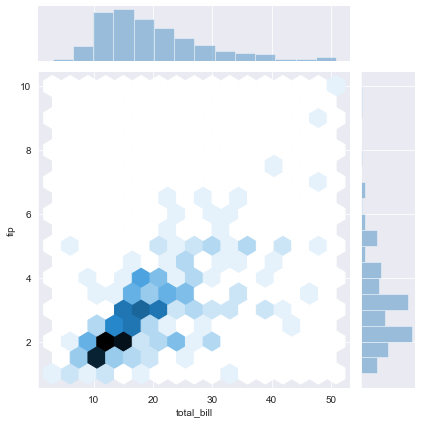

In [13]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

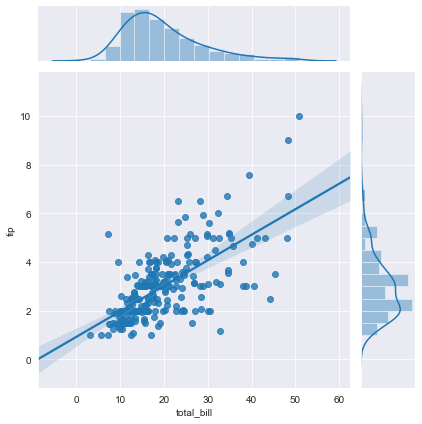

In [17]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

## pairplot

pairplot will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns). 

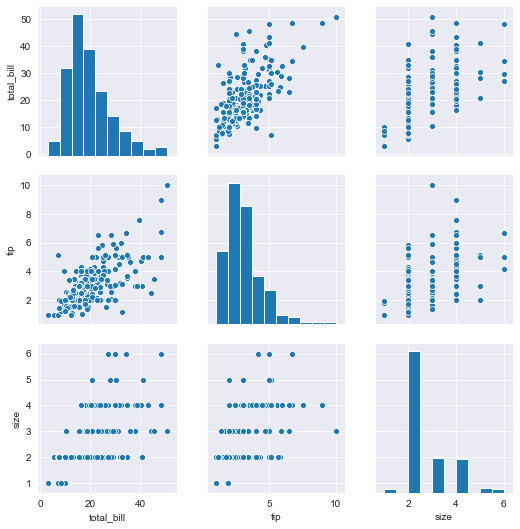

In [16]:
sns.pairplot(tips)

`pairplot` function has `hue` argument that expects categorical attribute, so that each category is displayed in a different color, with colors palette defined by `palette` argument.

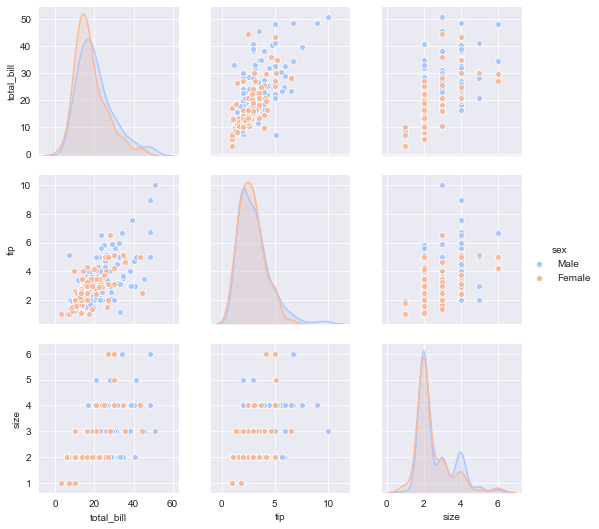

In [20]:
sns.pairplot(tips, hue='sex', palette='coolwarm')

# Categorical Data Plots

Now let's discuss using seaborn to plot categorical data! There are a few main plot types for this:

* boxplot
* barplot
* countplot

Let's go through examples of each!

In [21]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## barplot and countplot

These very similar plots allow you to get aggregate data off a categorical feature in your data.

A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle and provides some indication of the uncertainty around that estimate using *error bars*. Bar plots include 0 in the quantitative axis range, and they are a good choice when 0 is a meaningful value for the quantitative variable, and you want to make comparisons against it.

See [this](https://stackoverflow.com/questions/29481134/how-are-the-error-bands-in-seaborn-tsplot-calculated) discussion on StackOverflow to get a better insight into what error bars are.

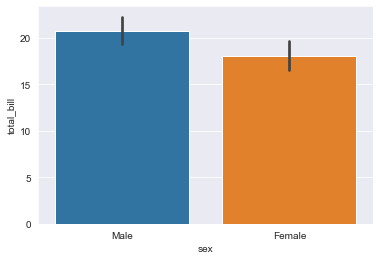

In [23]:
sns.barplot(x='sex', y='total_bill', data=tips)

You can change the estimator object to your own function, that converts a vector to a scalar:

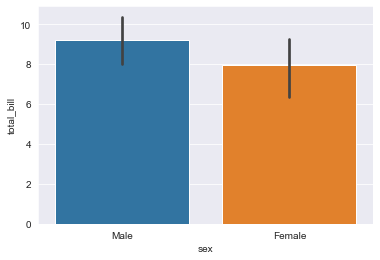

In [43]:
sns.barplot(x='sex', y='total_bill', data=tips, estimator=np.std)

### countplot

This is essentially the same as barplot except the estimator is explicitly counting the number of occurrences. Which is why we only pass the x value:

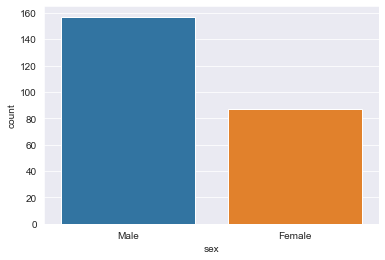

In [44]:
sns.countplot(x='sex',data=tips)

`sns.barplot(x='sex', y='total_bill', data=tips, estimator=np.count_nonzero)` will produce similar results, but without considering zero vaules for `y`.

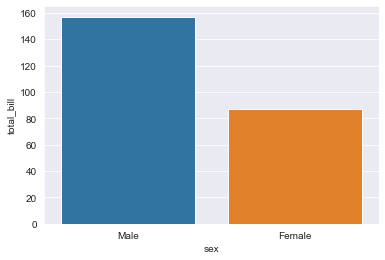

In [48]:
sns.barplot(x='sex', y='total_bill', data=tips, estimator=np.count_nonzero, ci=95)

## boxplot

boxplots and violinplots are used to shown the distribution of categorical data. A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

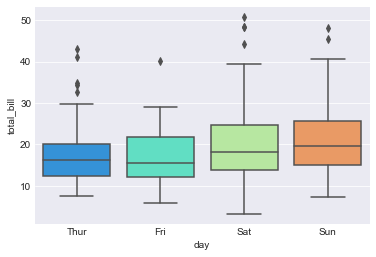

In [20]:
sns.boxplot(x="day", y="total_bill", data=tips,palette='rainbow')

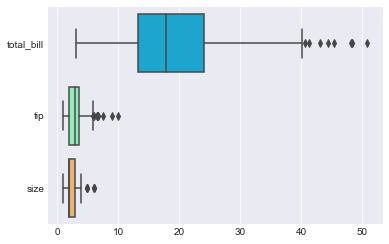

In [21]:
# Can do entire dataframe with orient='h'
sns.boxplot(data=tips,palette='rainbow',orient='h')

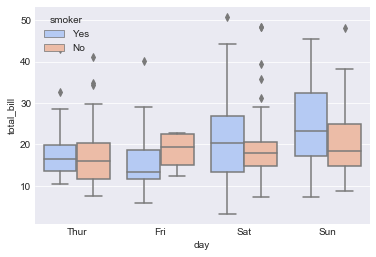

In [22]:
sns.boxplot(x="day", y="total_bill", hue="smoker",data=tips, palette="coolwarm")

# Matrix Plots

Matrix plots allow you to plot data as color-encoded matrices and can also be used to indicate clusters within the data (later in the machine learning section we will learn how to formally cluster data).

Let's begin by exploring seaborn's heatmap and clustermap:

In [49]:
flights = sns.load_dataset('flights')
tips = sns.load_dataset('tips')

In [26]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [27]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


## Heatmap

In order for a heatmap to work properly, your data should already be in a matrix form, the sns.heatmap function basically just colors it in for you. For example:

In [51]:
# Matrix form for correlation data
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


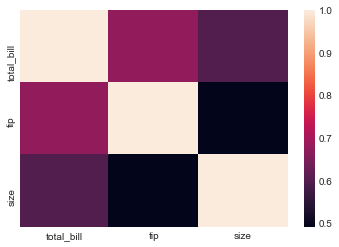

In [29]:
sns.heatmap(tips.corr())

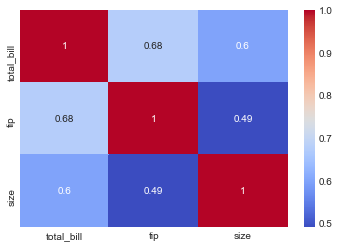

In [30]:
sns.heatmap(tips.corr(),cmap='coolwarm',annot=True)

Or for the flights data:

In [52]:
flights.pivot_table(values='passengers',index='month',columns='year')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


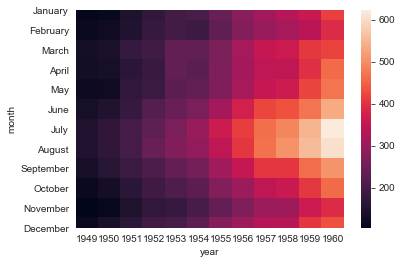

In [53]:
pvflights = flights.pivot_table(values='passengers',index='month',columns='year')
sns.heatmap(pvflights)

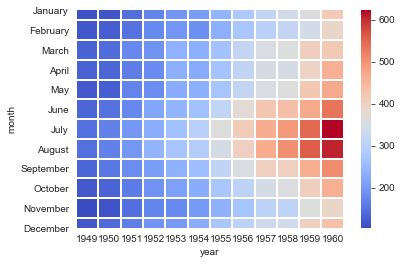

In [54]:
sns.heatmap(pvflights,cmap='coolwarm',linecolor='white',linewidths=1)

# Regression Plots

Seaborn has many built-in capabilities for regression plots, however we won't really discuss regression until the machine learning section of the course, so we will only cover the **lmplot()** function for now.

**lmplot** allows you to display linear models, but it also conveniently allows you to split up those plots based off of features, as well as coloring the hue based off of features.

Let's explore how this works:

In [55]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Regression plots

There are two main functions in seaborn that are used to visualize a linear relationship as determined through regression: [`regplot()`](https://seaborn.pydata.org/generated/seaborn.regplot.html#seaborn.regplot) and [`lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html#seaborn.lmplot).

Both function are closely related, and share much of their core functionality.

Very nice introduction to regression plots can be found [here](https://seaborn.pydata.org/tutorial/regression.html#regression-tutorial).

Both [`regplot()`](https://seaborn.pydata.org/generated/seaborn.regplot.html#seaborn.regplot) and [`lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html#seaborn.lmplot) draw a scatterplot of two variables, `x` and `y`, and then fit the regression model `y ~ x` and plot the resulting regression line and a 95% confidence interval for that regression:

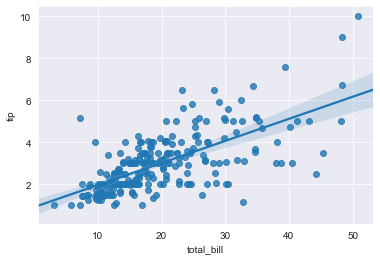

In [61]:
sns.regplot(x='total_bill',y='tip',data=tips)

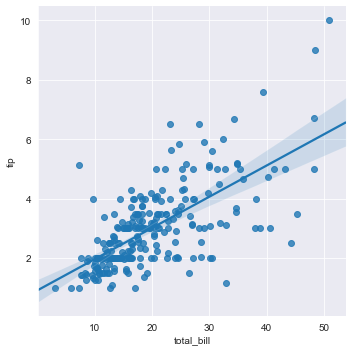

In [58]:
sns.lmplot(x='total_bill',y='tip',data=tips)

The main difference between `regplot()` and `lmplot()` is that `regplot()` accepts the `x` and `y` variables in a variety of formats including simple numpy arrays, pandas Series objects, or as references to variables in a pandas DataFrame object passed to data. In contrast, lmplot() has data as a required parameter and the x and y variables must be specified as strings. 

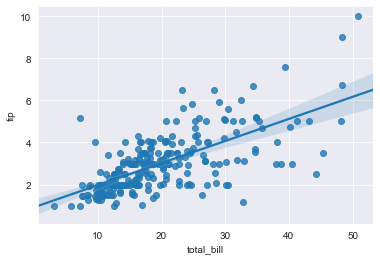

In [62]:
sns.regplot(x=tips['total_bill'],y=tips['tip'])

Other than this input flexibility, `regplot()` possesses a subset of `lmplot()`’s features, so we will demonstrate them using the latter.

### Conditioning regression plots on other variables

`lmplot()` provides an easy interface to show a linear regression plots that allow exploring interactions with up to three additional categorical variables.

`hue` parameter allows to add a third dimensions representing a categorical value and presenting it using colors or markers

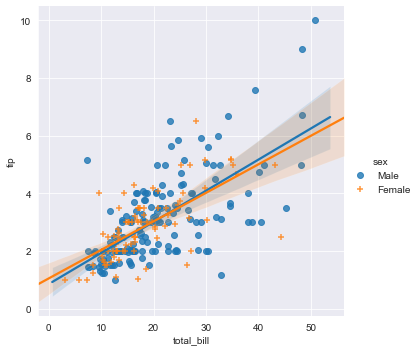

In [65]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex', markers=['o', '+'])

### Using a Grid

We can add oen or two additional variables  through columns and rows with the use of a grid. Just indicate this with the col or row arguments:

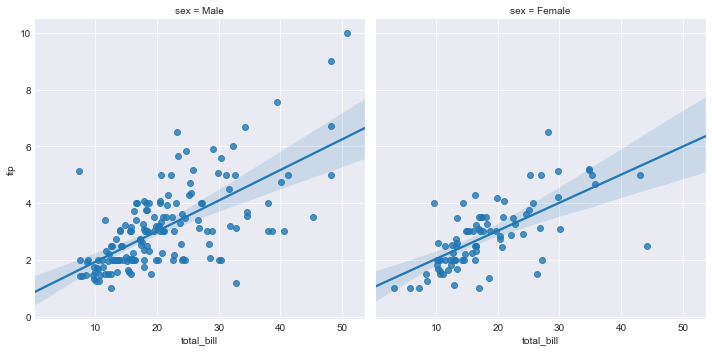

In [37]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='sex')

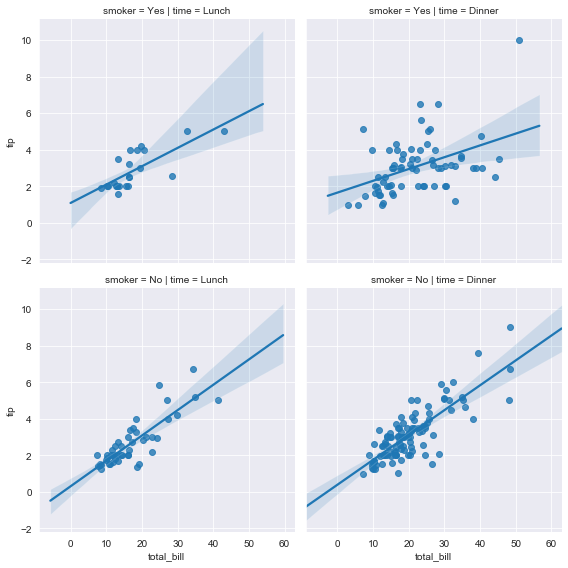

In [80]:
sns.lmplot(x="total_bill", y="tip", row="smoker", col="time",data=tips, size=4)

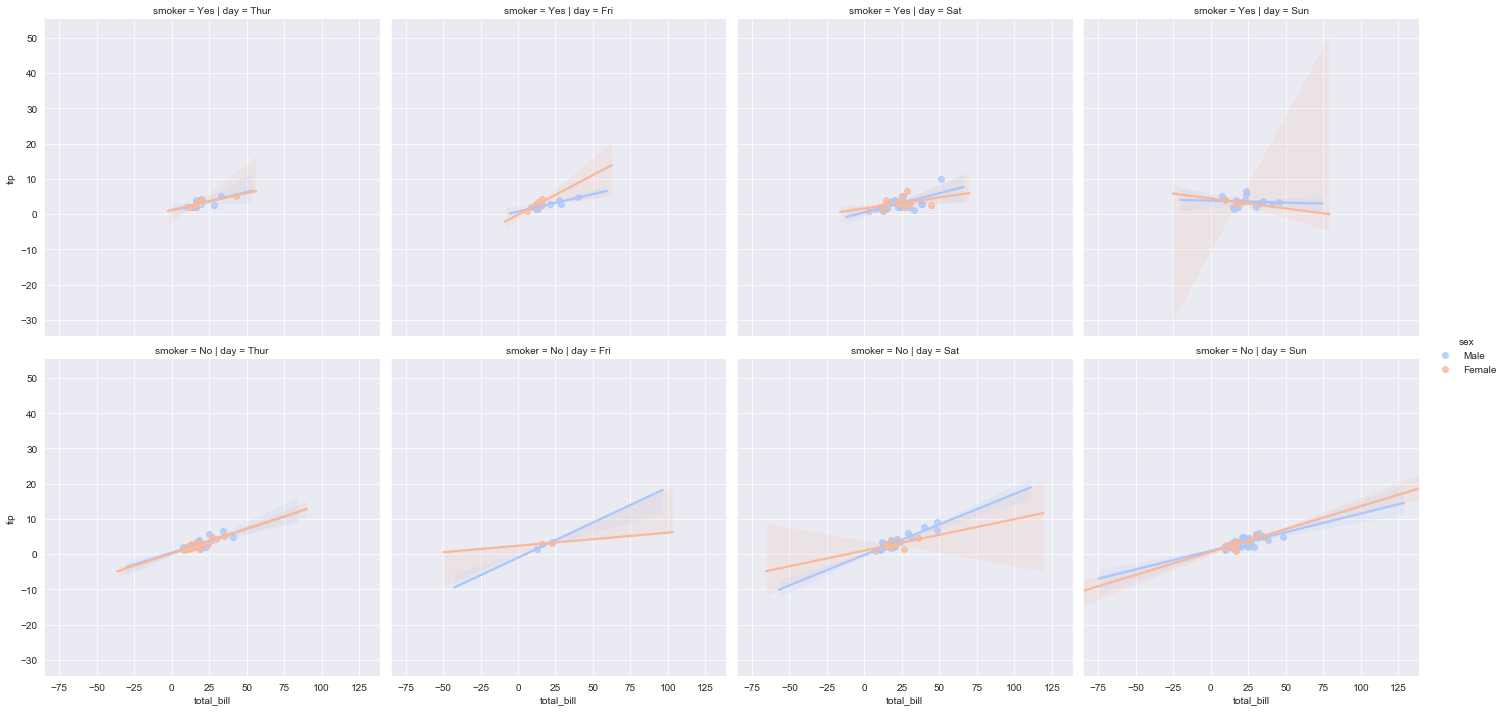

In [71]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',row='smoker',hue='sex',palette='coolwarm')

## Aspect and Size

Seaborn figures can have their size and aspect ratio adjusted with the **size** and **aspect** parameters:

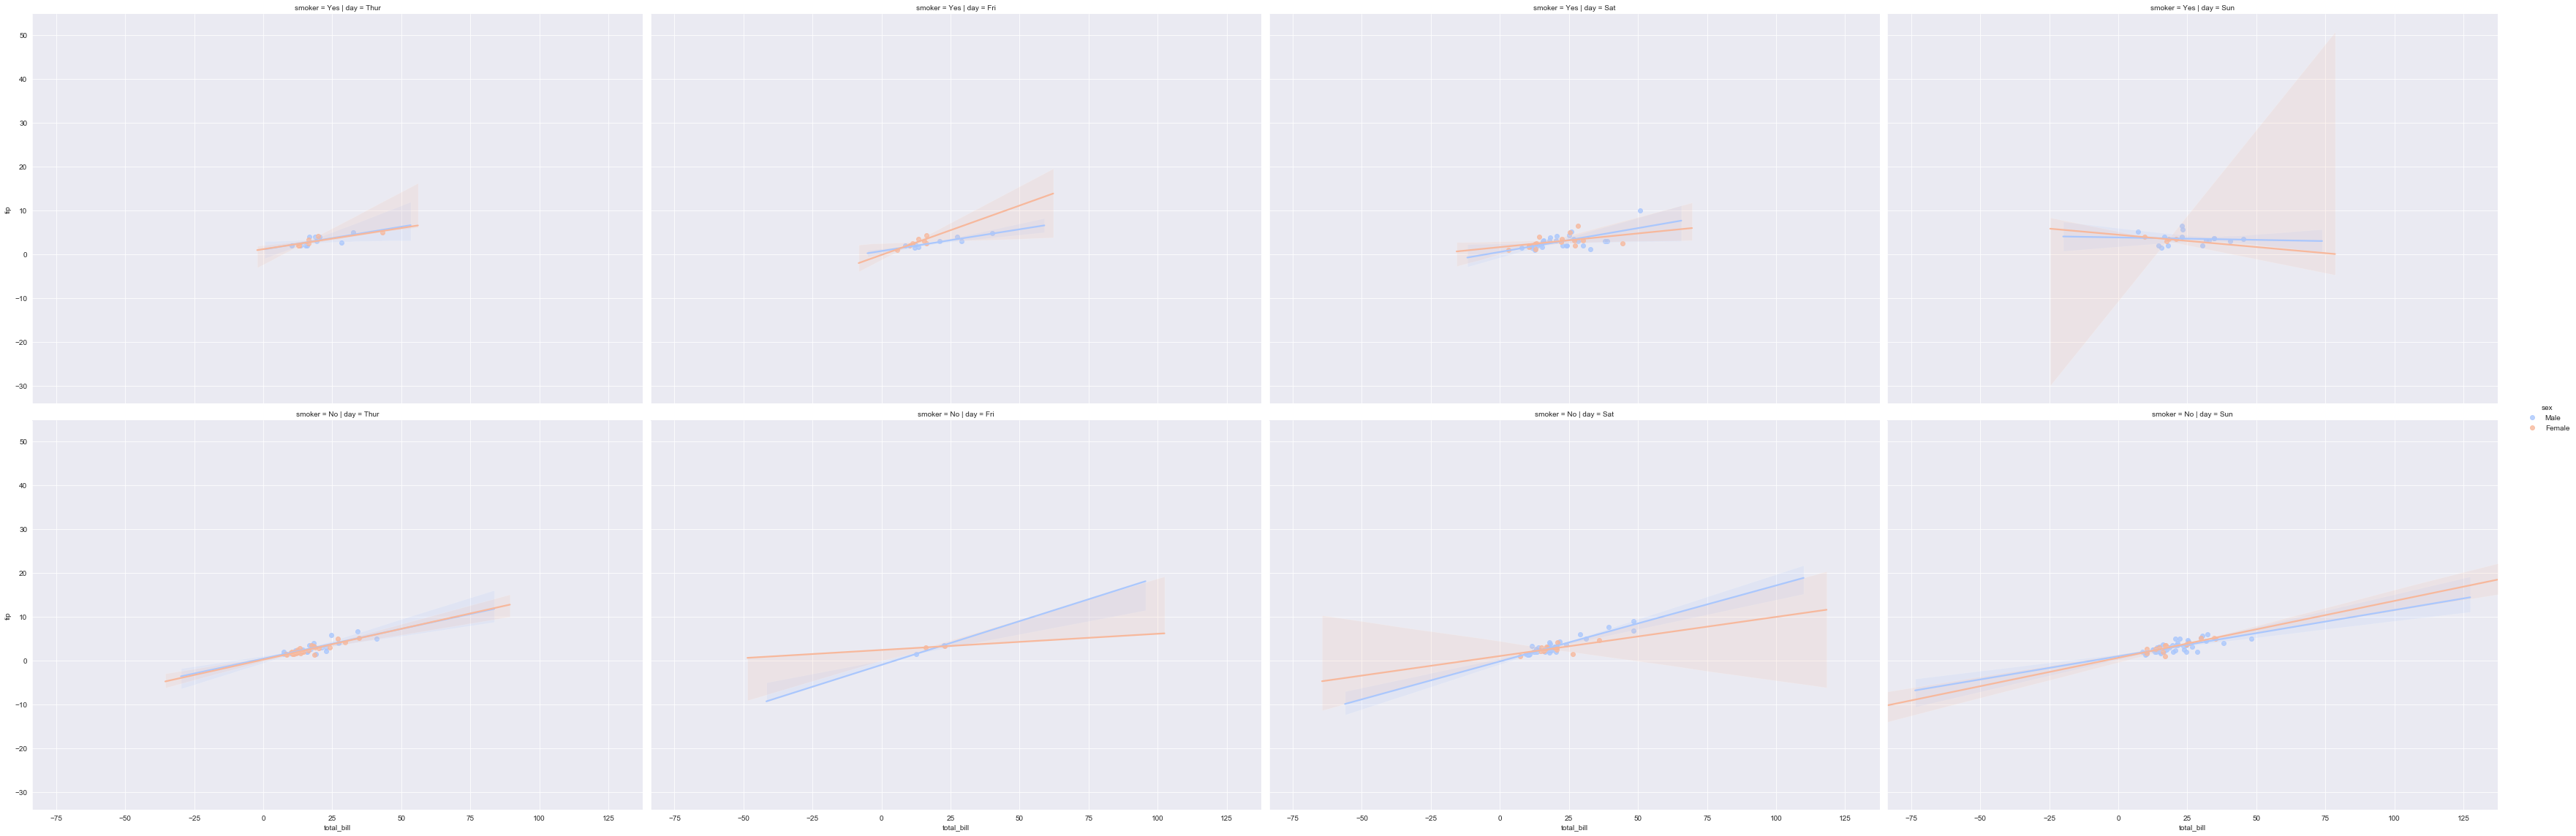

In [76]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',row='smoker',hue='sex',
           palette='coolwarm', aspect=1.5,size=8)